In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r

### Land use info

<ipython-input-2-1d182f5c0b4b>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[0].pcolormesh(lons,lats,LU_obs,cmap=newcmp,vmin=0,vmax=19)
<ipython-input-2-1d182f5c0b4b>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[1].pcolormesh(lons,lats,LU_notrees,cmap=newcmp,vmin=0,vmax=19)
<ipython-input-2-1d182f5c0b4b>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

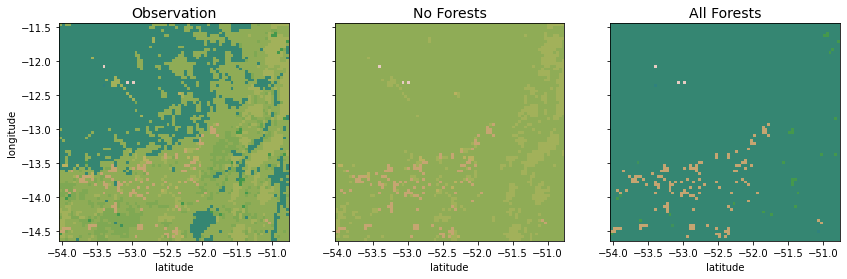

In [2]:
path = '/jet/home/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Tanguro201406/wrfout_d01_2014-06-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,:]
    lons = ds['XLONG'][0,:,:]
    znu  = ds['ZNU'][0,:]
    LU_obs = ds['LU_INDEX'][0,:]

with xarray.open_dataset(path+'Tanguro201406_notrees/wrfout_d01_2014-06-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    LU_notrees = ds['LU_INDEX'][0,:]

with xarray.open_dataset(path+'Tanguro201406_alltrees/wrfout_d01_2014-06-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    LU_alltrees = ds['LU_INDEX'][0,:]

fig,axes = plt.subplots(1,3,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()
bounds = np.linspace(1, 12, 12)
norm = colors.BoundaryNorm(boundaries=bounds, extend='both',ncolors=26)
cmap_old = cm.get_cmap('gist_earth', 256)
newcolors = cmap_old(np.linspace(0.25, 1.0, 156))
newcmp = ListedColormap(newcolors)

axes[0].pcolormesh(lons,lats,LU_obs,cmap=newcmp,vmin=0,vmax=19)
axes[1].pcolormesh(lons,lats,LU_notrees,cmap=newcmp,vmin=0,vmax=19)
axes[2].pcolormesh(lons,lats,LU_alltrees,cmap=newcmp,vmin=0,vmax=19)
titles=['Observation','No Forests','All Forests']
for ii in range(3):
    axes[ii].set_title(titles[ii],fontsize=14)
    axes[ii].set_xlabel('latitude')
    axes[0].set_ylabel('longitude')
fig.savefig('plot_LUindex_June.png',format='png',dpi=400,bbox_inches='tight')

## HFX, LH, SWUPB, TSK at noon. Keep the diurnal cycle
#### Average between day 5-day 30

In [3]:
### OBS land use
path = '/jet/home/xjliu/Amazon_exp/'
files = sorted(glob.glob(path+'Tanguro201406/energyflux_d01_2014-06-*00:00:00'))
with xarray.open_dataset(files[10],decode_times=True,
                         mask_and_scale='True') as ds:
    HFX_obs = ds['HFX']
    LH_obs = ds['LH']
    SWUPB_obs = ds['SWUPB']
    PBLH_obs = ds['PBLH']

for filename in files[11:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        HFX_obs = xarray.concat([HFX_obs,ds['HFX']],dim='Day')
        LH_obs = xarray.concat([LH_obs,ds['LH']],dim='Day')
        SWUPB_obs = xarray.concat([SWUPB_obs,ds['SWUPB']],dim='Day')
        PBLH_obs = xarray.concat([PBLH_obs,ds['PBLH']],dim='Day')
HFX_obs_mean = HFX_obs.mean('Day')
LH_obs_mean = LH_obs.mean('Day')
SWUPB_obs_mean = SWUPB_obs.mean('Day')
PBLH_obs_mean = PBLH_obs.mean('Day')


### Diurnal cycle of LH

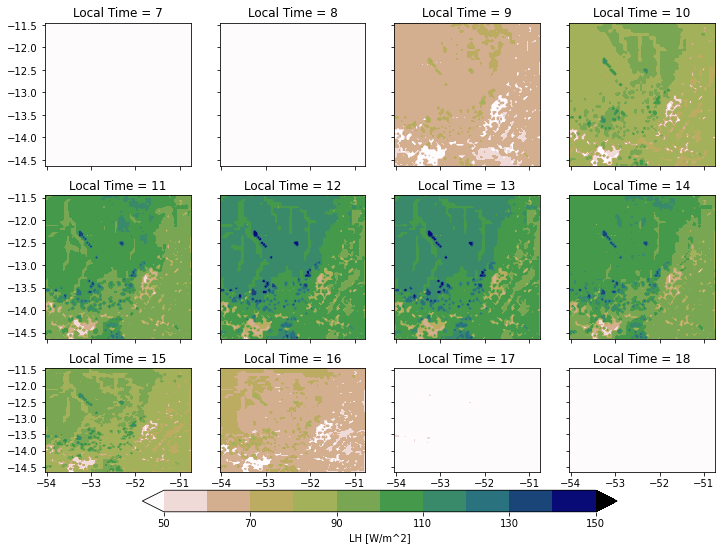

In [32]:
fig,axes = plt.subplots(3,4,figsize=(12,9),sharex=True,sharey=True)
axes = axes.ravel()
for ii in np.arange(10,22,1):
    im = axes[ii-10].contourf(lons,lats,SWUPB_obs_mean[ii,:,:],
            cmap='gist_earth_r', extend='both',
            levels=np.linspace(50,150,11))
    axes[ii-10].set_title('Local Time = '+str(ii-3))

fig.colorbar(im, ax=axes[8:12], shrink=0.976,orientation='horizontal',
            label='LH [W/m^2]',
             pad = 0.13,
            fraction=0.15)
#fig.savefig('plot_TSK_June.png',format='png',dpi=400,bbox_inches='tight')

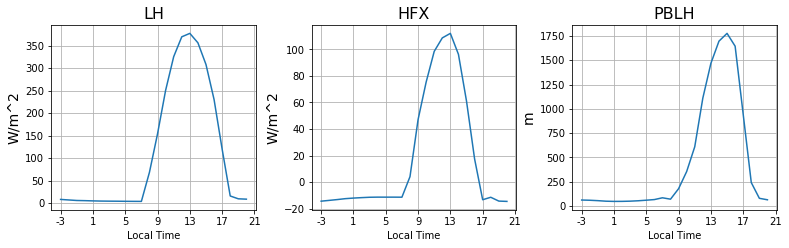

In [5]:
LH_obs_mean_ave = LH_obs_mean.mean(('west_east','south_north'))
HFX_obs_mean_ave = HFX_obs_mean.mean(('west_east','south_north'))
PBLH_obs_mean_ave = PBLH_obs_mean.mean(('west_east','south_north'))

fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True)
fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

units=['W/m^2','W/m^2','m']
for ii,varname in enumerate(['LH','HFX','PBLH']):
    var = varname+'_obs_mean_ave'
    axes[ii].plot(LH_obs_mean_ave.Time,locals()[var])
    axes[ii].set_title(varname,fontsize=16)
    axes[ii].set_ylabel(units[ii],fontsize=14)
    axes[ii].grid()
    axes[ii].set_xticks(np.arange(0,25,4))
    axes[ii].set_xticklabels(np.arange(0,25,4)-3)
    axes[ii].set_xlabel('Local Time')
fig.savefig('plot_diurnalcycle_June.png',format='png',dpi=400,bbox_inches='tight')

In [6]:
### All trees
files = sorted(glob.glob(path+'Tanguro201406_alltrees/energyflux_d01_2014-06-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    HFX_alltrees = ds['HFX']
    LH_alltrees = ds['LH']
    SWUPB_alltrees = ds['SWUPB']

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        HFX_alltrees = xarray.concat([HFX_alltrees,ds['HFX']],dim='Day')
        LH_alltrees = xarray.concat([LH_alltrees,ds['LH']],dim='Day')
        SWUPB_alltrees = xarray.concat([SWUPB_alltrees,ds['SWUPB']],dim='Day')
HFX_alltrees_mean = HFX_alltrees.mean('Day')
LH_alltrees_mean = LH_alltrees.mean('Day')
SWUPB_alltrees_mean = SWUPB_alltrees.mean('Day')

### No trees
files = sorted(glob.glob(path+'Tanguro201406_notrees/energyflux_d01_2014-06-*00:00:00'))
with xarray.open_dataset(files[5],decode_times=True,
                         mask_and_scale='True') as ds:
    HFX_notrees = ds['HFX']
    LH_notrees = ds['LH']
    SWUPB_notrees = ds['SWUPB']

for filename in files[6:21]:
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        HFX_notrees = xarray.concat([HFX_notrees,ds['HFX']],dim='Day')
        LH_notrees = xarray.concat([LH_notrees,ds['LH']],dim='Day')
        SWUPB_notrees = xarray.concat([SWUPB_notrees,ds['SWUPB']],dim='Day')
HFX_notrees_mean = HFX_notrees.mean('Day')
LH_notrees_mean = LH_notrees.mean('Day')
SWUPB_notrees_mean = SWUPB_notrees.mean('Day')

### Latent heat

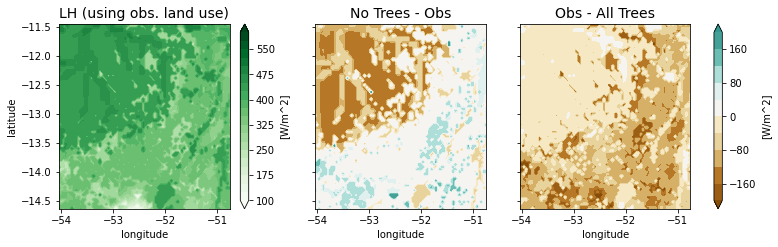

In [19]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)
norm = colors.TwoSlopeNorm(vmin=-200.,vcenter=0., vmax=200)

localT = 13
im0 = axes[0].contourf(lons,lats,LH_obs_mean[localT+3,:,:],
                levels=np.linspace(100,600,21),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,LH_notrees_mean[localT+3,:,:]-LH_obs_mean[localT+3,:,:],
                levels=np.linspace(-200,200,11),
                 extend='both',cmap=newcmp)
                       #norm=norm)
im1 = axes[2].contourf(lons,lats,LH_obs_mean[localT+3,:,:]-LH_alltrees_mean[localT+3,:,:],
                levels=np.linspace(-200,200,11),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)

fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[W/m^2]')
#fig.colorbar(im2,ax=axes[2])

titles=['LH (using obs. land use)','No Trees - Obs','Obs - All Trees']
for ii in range(3):
    axes[ii].set_title(titles[ii],fontsize=14)
    axes[ii].set_xlabel('longitude')
    axes[0].set_ylabel('latitude')
fig.savefig('plot_LH_June.png',format='png',dpi=600,bbox_inches='tight')

## HFX

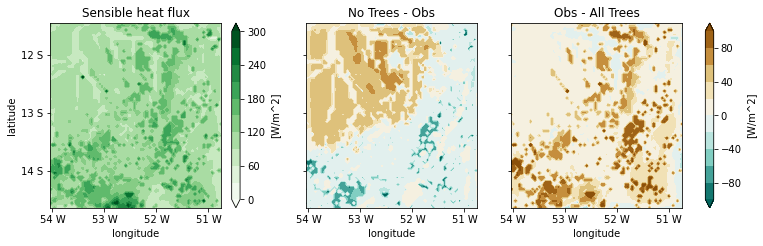

In [22]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.175)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG_r', 256)
newcolors = cmap_old(np.linspace(0.1, 0.9, 256))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-200.,vcenter=0., vmax=20)

localT = 13
varname = 'HFX'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(0,300,11),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,locals()[varname+'_notrees_mean'][localT+3,:,:]-locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(-100,100,11),
                 extend='both',
                       #norm=norm, 
                       cmap=newcmp)
im1 = axes[2].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:]-locals()[varname+'_alltrees_mean'][localT+3,:,:],
                levels=np.linspace(-100,100,11),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)
fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[W/m^2]')

titles=['Sensible heat flux','No Trees - Obs','Obs - All Trees']
    
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[0].set_ylabel('latitude')
    axes[ii].set_xlabel('longitude')
    axes[ii].set_xticks(np.arange(-54,-50,1))
    axes[ii].set_xticklabels(['54 W','53 W','52 W','51 W'])
    axes[ii].set_yticks(np.arange(-14,-11,1))
    axes[ii].set_yticklabels(['14 S','13 S','12 S'])

#fig.savefig('plot_HFX_June.png',format='png',dpi=600,bbox_inches='tight')


## LH + HFX

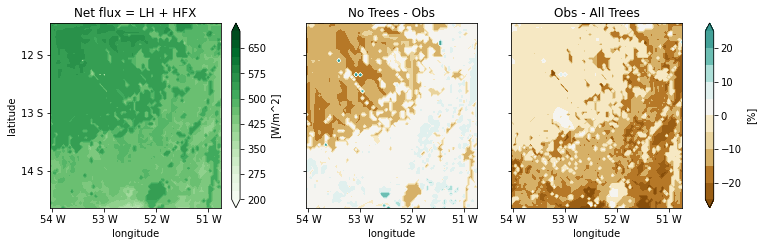

In [24]:
netFLX_notrees_mean = LH_notrees_mean + HFX_notrees_mean
netFLX_alltrees_mean = LH_alltrees_mean + HFX_alltrees_mean
netFLX_obs_mean = LH_obs_mean + HFX_obs_mean

fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-40.,vcenter=0., vmax=40)

localT = 13
varname = 'netFLX'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(200,700,21),
                    extend='both',
                 cmap='Greens')
frac1 = (locals()[varname+'_notrees_mean']-locals()[varname+'_obs_mean'])/locals()[varname+'_obs_mean']*100
frac2 = (locals()[varname+'_obs_mean']-locals()[varname+'_alltrees_mean'])/locals()[varname+'_obs_mean']*100

im1 = axes[1].contourf(lons,lats,frac1[localT+3,:,:],
                levels=np.linspace(-25,25,11),
                 extend='both',
                       #norm=norm, 
                       cmap=newcmp)
im1 = axes[2].contourf(lons,lats,frac2[localT+3,:,:],
                levels=np.linspace(-25,25,11),
                       #norm = norm,
                extend='both',
                 cmap=newcmp)

titles=['Net flux = LH + HFX','No Trees - Obs','Obs - All Trees']
    
fig.colorbar(im0,ax=axes[0],label='[W/m^2]')
fig.colorbar(im1,ax=axes[1:3],label='[%]')
    
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[0].set_ylabel('latitude')
    axes[ii].set_xlabel('longitude')
    axes[ii].set_xticks(np.arange(-54,-50,1))
    axes[ii].set_xticklabels(['54 W','53 W','52 W','51 W'])
    axes[ii].set_yticks(np.arange(-14,-11,1))
    axes[ii].set_yticklabels(['14 S','13 S','12 S'])

fig.savefig('plot_netFlux_June.png',format='png',dpi=600,bbox_inches='tight')


# SWUPB

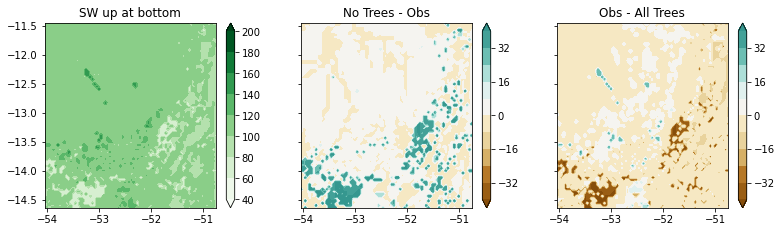

In [10]:
fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

cmap_old = cm.get_cmap('BrBG', 56)
newcolors = cmap_old(np.linspace(0.1, 0.8, 26))
newcmp = ListedColormap(newcolors)

norm = colors.TwoSlopeNorm(vmin=-40.,vcenter=0., vmax=40)

localT = 13
varname = 'SWUPB'
im0 = axes[0].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(40,200,9),
                    extend='both',
                 cmap='Greens')
im1 = axes[1].contourf(lons,lats,locals()[varname+'_notrees_mean'][localT+3,:,:]-locals()[varname+'_obs_mean'][localT+3,:,:],
                levels=np.linspace(-40,40,11),
                 extend='both',cmap=newcmp,
                       norm=norm)
im2 = axes[2].contourf(lons,lats,locals()[varname+'_obs_mean'][localT+3,:,:]-locals()[varname+'_alltrees_mean'][localT+3,:,:],
                levels=np.linspace(-40,40,11),
                       norm = norm,
                extend='both',
                 cmap=newcmp)

fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])

titles=['SW up at bottom','No Trees - Obs','Obs - All Trees']
for ii in range(3):
    axes[ii].set_title(titles[ii])

In [11]:
ds

<xarray.Dataset>
Dimensions:  (Time: 24, south_north: 80, west_east: 80)
Dimensions without coordinates: Time, south_north, west_east
Data variables: (12/26)
    Times    (Time) |S19 ...
    SWDOWN   (Time, south_north, west_east) float32 ...
    GLW      (Time, south_north, west_east) float32 ...
    SWNORM   (Time, south_north, west_east) float32 ...
    SWUPT    (Time, south_north, west_east) float32 ...
    SWDNT    (Time, south_north, west_east) float32 ...
    ...       ...
    TMN      (Time, south_north, west_east) float32 ...
    UST      (Time, south_north, west_east) float32 ...
    PBLH     (Time, south_north, west_east) float32 ...
    HFX      (Time, south_north, west_east) float32 ...
    QFX      (Time, south_north, west_east) float32 ...
    LH       (Time, south_north, west_east) float32 ...
Attributes: (12/85)
    TITLE:                            OUTPUT FROM WRF V4.3 MODEL
    START_DATE:                      2014-06-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        81
    SOUTH-NORTH_GRID_DIMENSION:      81
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              4000.0
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2